In [3]:
# Import Dependencies
from pathlib import Path
import pandas as pd
import requests
import json
from api_key import open_weather_api_key
import numpy as np
from datetime import datetime, timedelta
import calendar
import sklearn.datasets as dta
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [4]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
#Create a path variable to the data
air_quality_path = Path('Output/Air_quality/air_quality.csv')

In [9]:
# Import the data into a Pandas DataFrame
air_quality_data_df = pd.read_csv(air_quality_path)
air_quality_data_df

,State Name,Statistical Areas Level 2 Name,Population,Area km2,Population Density (Persons/km2),Latitude,Longitude,Average CO (μg/m3),Average O3 (μg/m3),Average NO2 (μg/m3),Average S02 (μg/m3),Average PM2.5 (μg/m3),Average PM10 (μg/m3)
0,New South Wales,Braidwood,4330,3418.4,1.0,41.2650,-88.2123,283.442500,72.566667,8.796667,1.959167,8.870000,9.447500
1,New South Wales,Karabar,8546,7.0,"1,224.0",-35.3753,149.2308,255.904583,55.647917,6.565417,1.588750,6.675000,7.647500
2,New South Wales,Queanbeyan,11370,4.8,"2,388.0",-35.3500,149.2333,246.725278,50.008333,5.821667,1.465278,5.943333,7.047500
3,New South Wales,Queanbeyan,5093,13.0,392.0,-35.3500,149.2333,242.135625,47.188542,5.449792,1.403542,5.577500,6.747500
4,New South Wales,Googong,6245,6.9,903.0,-35.4177,149.2334,242.135625,47.188542,5.449792,1.403542,5.577500,6.747500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,Australian Capital Territory,Molonglo,0,2.2,0.0,-35.2998,149.0402,253.008652,42.785339,8.280131,3.799508,4.958023,7.525435
1796,Australian Capital Territory,Wright,3806,1.3,"2,993.0",45.1833,-93.9502,252.990538,42.776613,8.279230,3.797958,4.956432,7.523417
1797,Other Territories,Christmas Island,1716,136.1,13.0,-10.5000,105.6667,253.006920,42.763641,8.282959,3.797872,4.955646,7.522579
1798,Other Territories,Jervis Bay,310,67.2,5.0,-35.1333,150.7000,252.988835,42.754944,8.282057,3.796325,4.954060,7.520567


In [10]:
#Add Population Density data to dataframe
air_quality_data_df["Population Density (Persons/km2)"] = air_quality_data_df["Population"] / air_quality_data_df["Area km2"]
air_quality_data_df.dtypes

State Name                           object
Statistical Areas Level 2 Name       object
Population                            int64
Area km2                            float64
Population Density (Persons/km2)    float64
Latitude                            float64
Longitude                           float64
Average CO (μg/m3)                  float64
Average O3 (μg/m3)                  float64
Average NO2 (μg/m3)                 float64
Average S02 (μg/m3)                 float64
Average PM2.5 (μg/m3)               float64
Average PM10 (μg/m3)                float64
dtype: object

In [11]:
#Check data stastistic
air_quality_data_df.describe()

,Population,Area km2,Population Density (Persons/km2),Latitude,Longitude,Average CO (μg/m3),Average O3 (μg/m3),Average NO2 (μg/m3),Average S02 (μg/m3),Average PM2.5 (μg/m3),Average PM10 (μg/m3)
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,10801.595556,2514.618000,1464.267881,-14.234076,93.770843,245.560598,42.754103,7.737943,3.971621,4.918893,7.265453
std,6081.355713,21687.623957,1877.015569,33.070866,91.649565,15.960658,1.154083,2.049514,0.926615,0.621288,0.954401
min,0.000000,0.500000,0.000000,-43.316700,-130.101500,207.138596,38.729423,2.117417,0.847833,3.583112,5.032708
25%,5770.750000,4.800000,87.947828,-35.213025,46.513975,236.183486,42.322827,7.257655,3.836391,4.610664,6.839310
50%,10041.500000,10.800000,975.012407,-32.056450,145.059900,253.017370,42.781296,8.585871,4.382143,5.031396,7.593300
75%,15214.250000,83.175000,2183.291506,-12.388550,150.950000,258.596937,43.046563,9.205764,4.628403,5.390175,7.988445
max,28573.000000,495840.400000,20672.500000,61.452200,178.004200,283.442500,72.566667,9.648888,4.930100,8.870000,9.447500


In [12]:
#Find iqr, upper bound and lower bound of the data
filters = ["Population Density (Persons/km2)", "Average CO (μg/m3)", "Average O3 (μg/m3)", "Average NO2 (μg/m3)", "Average S02 (μg/m3)", "Average PM2.5 (μg/m3)", "Average PM10 (μg/m3)"]

IQR = []
lower_bound_list = []
upper_bound_list = []
for filter in filters:
    quartiles = air_quality_data_df[filter].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    IQR.append(iqr)
    lower_bound = lowerq - (1.5*iqr)
    lower_bound_list.append(lower_bound)
    upper_bound = upperq + (1.5*iqr)
    upper_bound_list.append(upper_bound)

In [13]:
#Add iqr, upper bound and lower bound to a dataframe
quartile_df = pd.DataFrame({"Filter": filters,
                            "IQR": IQR,
                            "Lower Bounce": lower_bound_list,
                            "Upper Bounce": upper_bound_list})

quartile_df

,Filter,IQR,Lower Bounce,Upper Bounce
0,Population Density (Persons/km2),2095.343678,-3055.067689,5326.307022
1,Average CO (μg/m3),22.413450,202.563311,292.217112
2,Average O3 (μg/m3),0.723736,41.237222,44.132168
3,Average NO2 (μg/m3),1.948108,4.335493,12.127926
4,Average S02 (μg/m3),0.792013,2.648372,5.816422
5,Average PM2.5 (μg/m3),0.779510,3.441399,6.559440
6,Average PM10 (μg/m3),1.149135,5.115608,9.712147


In [14]:
#Filter the dataframe by removing all outliers
filtered_df = air_quality_data_df.loc[(air_quality_data_df["Population Density (Persons/km2)"] < 5326.307022) & (air_quality_data_df["Population Density (Persons/km2)"] > -3055.067689)
                                      & (air_quality_data_df["Average CO (μg/m3)"] < 292.217112) & (air_quality_data_df["Average CO (μg/m3)"] > 202.563311)
                                      & (air_quality_data_df["Average O3 (μg/m3)"] < 44.132168) & (air_quality_data_df["Average O3 (μg/m3)"] > 41.237222)
                                      & (air_quality_data_df["Average NO2 (μg/m3)"] < 12.127926) & (air_quality_data_df["Average NO2 (μg/m3)"] > 4.335493)
                                      & (air_quality_data_df["Average S02 (μg/m3)"] < 5.816422) & (air_quality_data_df["Average S02 (μg/m3)"] > 2.648372)
                                      & (air_quality_data_df["Average PM2.5 (μg/m3)"] < 6.559440) & (air_quality_data_df["Average PM2.5 (μg/m3)"] > 3.441399)
                                      & (air_quality_data_df["Average PM10 (μg/m3)"] < 9.712147) & (air_quality_data_df["Average PM10 (μg/m3)"] > 5.115608)]

In [15]:
#Export filtered dataframe to csv file
filtered_df.to_csv("Output/no_outliers_air_quality.csv", index=False)

The correlation between Average CO (μg/m3) and the population density is -0.25
Line equation: y = -30.34x + 8861.45
The correlation between Average O3 (μg/m3) and the population density is 0.12
Line equation: y = 288.41x + -11041.16
The correlation between Average NO2 (μg/m3) and the population density is -0.19
Line equation: y = -235.78x + 3251.99
The correlation between Average S02 (μg/m3) and the population density is -0.04
Line equation: y = -105.43x + 1685.16
The correlation between Average PM2.5 (μg/m3) and the population density is -0.2
Line equation: y = -590.89x + 4262.03
The correlation between Average PM10 (μg/m3) and the population density is -0.22
Line equation: y = -465.88x + 4783.59


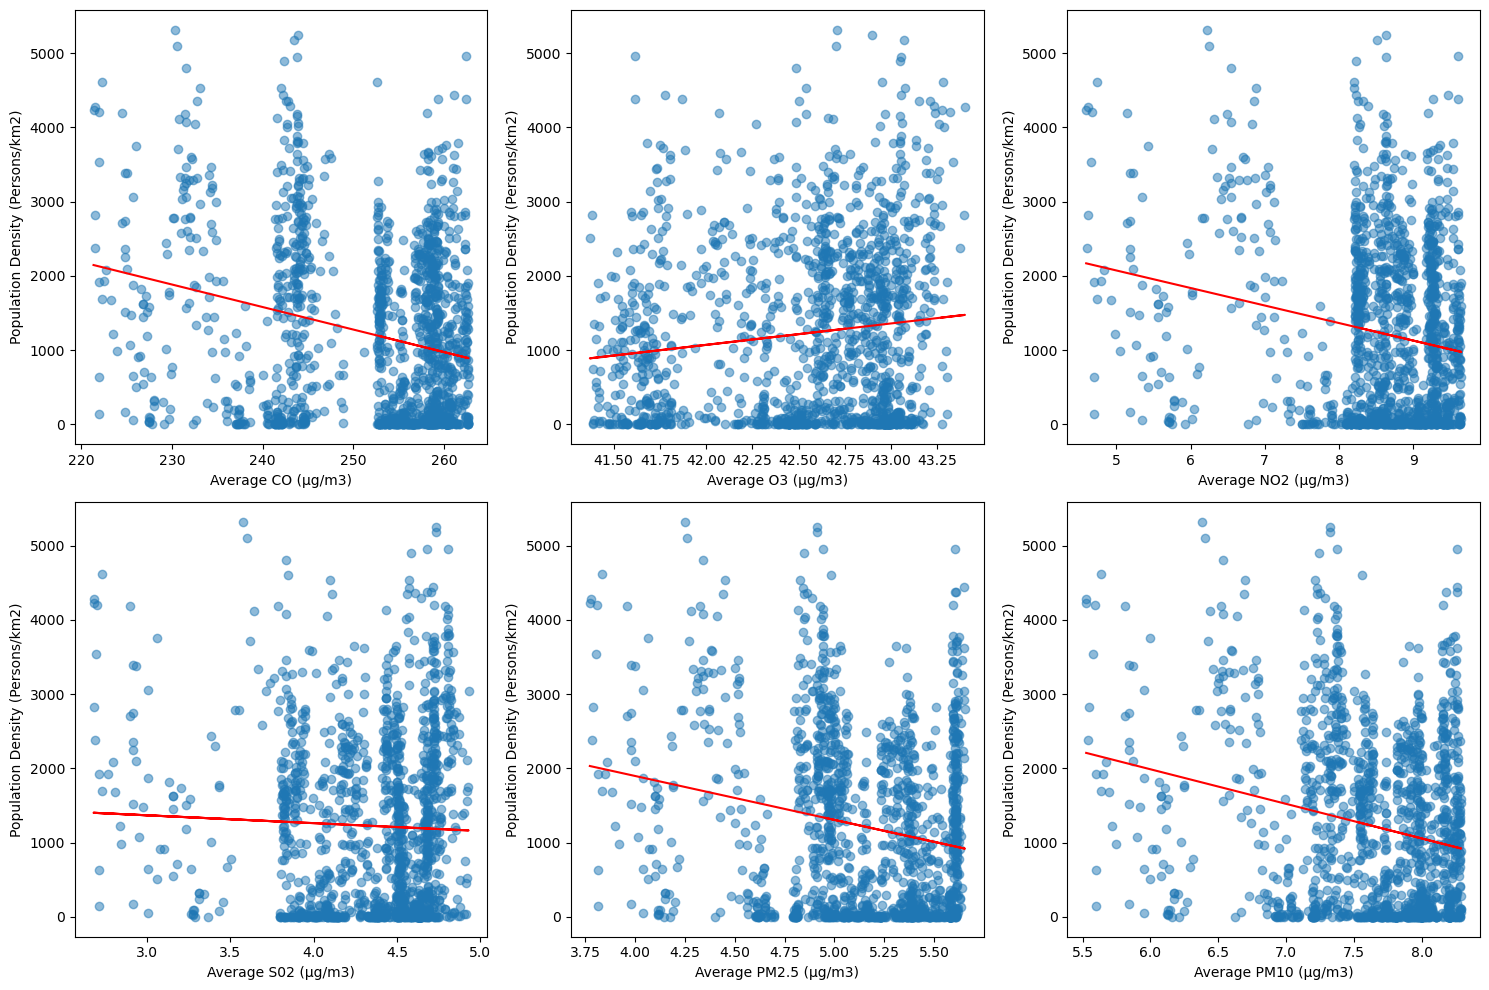

In [16]:
#Iterate though dataframe to find Pearson R and plot the scatter plot graphs 
air_quality_parameters = ["Average CO (μg/m3)", "Average O3 (μg/m3)", "Average NO2 (μg/m3)", "Average S02 (μg/m3)", "Average PM2.5 (μg/m3)", "Average PM10 (μg/m3)"]
plt.rcParams["figure.figsize"] = (15,10) 
correlation_list =[]
for parameter in air_quality_parameters:

    plt.subplot(2,3,air_quality_parameters.index(parameter) +1)
    x = filtered_df[parameter]
    y = filtered_df["Population Density (Persons/km2)"]
    correlation = st.pearsonr(x,y)
    correlation_list.append(correlation[0])
    print(f"The correlation between {parameter} and the population density is {round(correlation[0],2)}")
    plt.scatter(x, y, alpha=0.5)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    print(f"Line equation: {line_eq}")
    plt.xlabel(parameter)
    plt.ylabel("Population Density (Persons/km2)")
    plt.tight_layout()
    
plt.savefig('Output/air_pollution_vs_population_density.png') 

In [17]:
#Add Pearson R of key pollutants to a dataframe
correlation_df = pd.DataFrame({"Key Pollutants": air_quality_parameters,
                               "Pearson Correlation Coefficient (r)": correlation_list})
correlation_df

,Key Pollutants,Pearson Correlation Coefficient (r)
0,Average CO (μg/m3),-0.252824
1,Average O3 (μg/m3),0.124538
2,Average NO2 (μg/m3),-0.190880
3,Average S02 (μg/m3),-0.036953
4,Average PM2.5 (μg/m3),-0.201890
5,Average PM10 (μg/m3),-0.222463


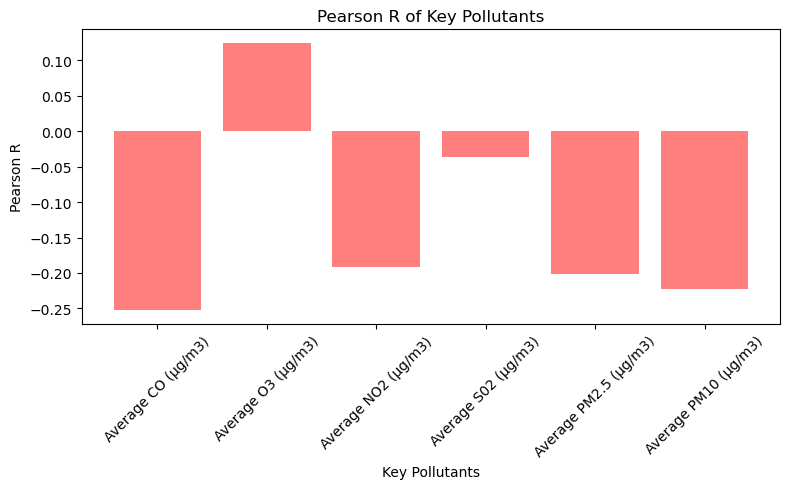

In [18]:
#Plot a bargraph of Peason R
x_axis = np.arange(len(correlation_df))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(8,5))
plt.bar(x_axis, correlation_list, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, air_quality_parameters, rotation=45)
plt.title("Pearson R of Key Pollutants")
plt.xlabel("Key Pollutants")
plt.ylabel("Pearson R")
plt.tight_layout()
plt.savefig('Output/Person_R.png')

In [56]:
#According to "", cities with population less than 15,0000 are considered as rural.
#Add classification to dataframe
for index, row in air_quality_data_df.iterrows():
    if row["Population"] > 10000:
        filtered_df.loc[index, "Classification"] = "Urban"
    else:
        filtered_df.loc[index, "Classification"] = "Rural"

filtered_df = filtered_df.dropna(how="any")
filtered_df

,State Name,Statistical Areas Level 2 Name,Population,Area km2,Population Density (Persons/km2),Latitude,Longitude,Average CO (μg/m3),Average O3 (μg/m3),Average NO2 (μg/m3),Average S02 (μg/m3),Average PM2.5 (μg/m3),Average PM10 (μg/m3),Classification
309,New South Wales,Croydon,10997.0,2.6,4229.615385,40.0873,-74.9035,221.349828,43.272041,4.590982,2.682462,3.773050,5.526101,Urban
311,New South Wales,Strathfield,9292.0,3.9,2382.564103,-33.8798,151.0756,221.540667,43.371027,4.607439,2.684420,3.783485,5.538246,Rural
312,New South Wales,St Leonards,11986.0,2.8,4280.714286,-33.8234,151.1984,221.548262,43.398533,4.617964,2.678477,3.778179,5.528450,Urban
315,New South Wales,Greenwich,12980.0,4.6,2821.739130,41.0265,-73.6285,221.457851,43.391039,4.615863,2.678733,3.788221,5.548401,Urban
316,New South Wales,Lane Cove,15931.0,4.5,3540.222222,-33.8167,151.1667,221.911510,43.335246,4.656853,2.691901,3.803929,5.578058,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,Australian Capital Territory,Molonglo,0.0,2.2,0.000000,-35.2998,149.0402,253.008652,42.785339,8.280131,3.799508,4.958023,7.525435,Rural
1796,Australian Capital Territory,Wright,3806.0,1.3,2927.692308,45.1833,-93.9502,252.990538,42.776613,8.279230,3.797958,4.956432,7.523417,Rural
1797,Other Territories,Christmas Island,1716.0,136.1,12.608376,-10.5000,105.6667,253.006920,42.763641,8.282959,3.797872,4.955646,7.522579,Rural
1798,Other Territories,Jervis Bay,310.0,67.2,4.613095,-35.1333,150.7000,252.988835,42.754944,8.282057,3.796325,4.954060,7.520567,Rural


In [57]:
filtered_df["Classification"].value_counts()

Classification
Rural    757
Urban    694
Name: count, dtype: int64

In [58]:
#Calculate mean of key pollutants based on Classification
grouped_classification_df = filtered_df.groupby(["Classification"])

mean_co_ur = grouped_classification_df["Average CO (μg/m3)"].mean()
mean_o3_ur = grouped_classification_df["Average O3 (μg/m3)"].mean()
mean_no2_ur = grouped_classification_df["Average NO2 (μg/m3)"].mean()
mean_so2_ur = grouped_classification_df["Average S02 (μg/m3)"].mean()
mean_pm2_5_ur = grouped_classification_df["Average PM2.5 (μg/m3)"].mean()
mean_pm_10_ur = grouped_classification_df["Average PM10 (μg/m3)"].mean()


In [59]:
#Add key pollutants to dataframe
urban_rural_df = pd.DataFrame({"Average CO (μg/m3)": mean_co_ur,
                               "Average O3 (μg/m3)": mean_o3_ur,
                               "Average NO2 (μg/m3)": mean_no2_ur,
                               "Average S02 (μg/m3)": mean_so2_ur,
                               "Average PM2.5 (μg/m3)": mean_pm2_5_ur,
                               "Average PM10 (μg/m3)": mean_pm_10_ur})
urban_rural_df

,Average CO (μg/m3),Average O3 (μg/m3),Average NO2 (μg/m3),Average S02 (μg/m3),Average PM2.5 (μg/m3),Average PM10 (μg/m3)
Classification,,,,,,
Rural,254.038318,42.526390,8.717117,4.317022,5.204639,7.749842
Urban,249.091643,42.548024,8.449537,4.379170,5.062369,7.508509


In [60]:
# Save the clean DataFrame to a CSV file without the index.
urban_rural_df.to_csv("Output/urban_vs_rural.csv", index=False)

p-value between Rural and Urban Average CO (μg/m3) is 1.6088482461842357e-21
Significant difference found
Accept Hypothesis
--------
p-value between Rural and Urban Average O3 (μg/m3) is 0.41862027134836655
No Significant difference found
Reject Hypothesis
--------
p-value between Rural and Urban Average NO2 (μg/m3) is 1.602498943190815e-07
Significant difference found
Accept Hypothesis
--------
p-value between Rural and Urban Average S02 (μg/m3) is 0.004655152141681556
Significant difference found
Accept Hypothesis
--------
p-value between Rural and Urban Average PM2.5 (μg/m3) is 2.8127084361969726e-11
Significant difference found
Accept Hypothesis
--------
p-value between Rural and Urban Average PM10 (μg/m3) is 6.767213303476201e-16
Significant difference found
Accept Hypothesis
--------


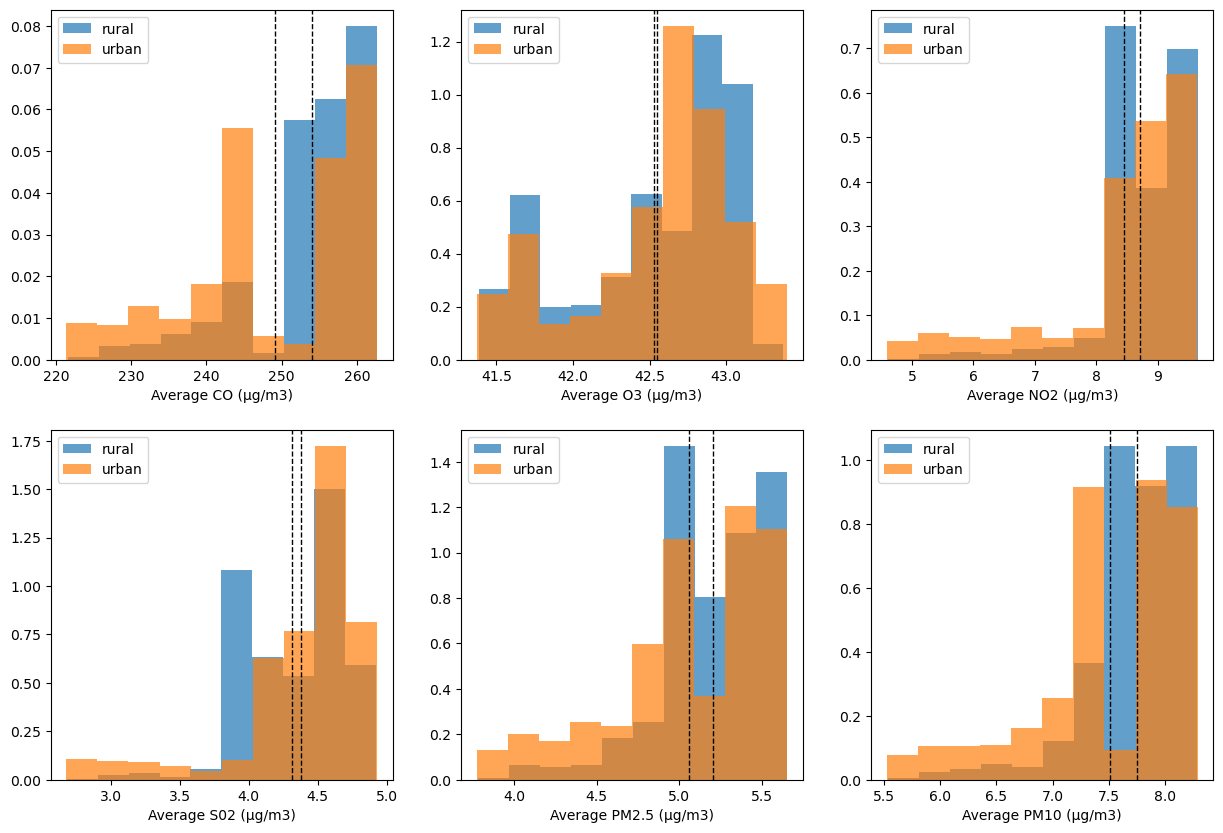

In [61]:
#Iterate though dataframe to find P-value and plot the histogram graphs 

p_value_list =[]
hypothesis =[]
for key in air_quality_parameters:
    rural = filtered_df.loc[filtered_df["Classification"] == "Rural"][key]
    urban = filtered_df.loc[filtered_df["Classification"] == "Urban"][key]

    plt.subplot(2,3,air_quality_parameters.index(key) +1)
    plt.hist(rural, 10, density=True, alpha=0.7, label="rural")
    plt.hist(urban, 10, density=True, alpha=0.7, label="urban")
    plt.axvline(rural.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(urban.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.xlabel(key)
    plt.legend()

    p_value = st.ttest_ind(rural, urban, equal_var=False)
    p_value_list.append(p_value[1])
    if p_value[1] > 0.05: 
        hypothesis.append("Reject")
        print(f"p-value between Rural and Urban {key} is {p_value[1]}")
        print("No Significant difference found")
        print("Reject Hypothesis")
        print("--------")
    else:
        hypothesis.append("Accept")
        print(f"p-value between Rural and Urban {key} is {p_value[1]}")
        print("Significant difference found")
        print("Accept Hypothesis")
        print("--------")

plt.savefig('Output/urban_vs_rural.png')      

In [63]:
#Add P-value to dataframe
Ttest_df = pd.DataFrame({"Key Pollutants": air_quality_parameters,
                         "P-value": p_value_list,
                         "Hypothesis": hypothesis})
Ttest_df

,Key Pollutants,P-value,Hypothesis
0,Average CO (μg/m3),1.608848e-21,Accept
1,Average O3 (μg/m3),4.186203e-01,Reject
2,Average NO2 (μg/m3),1.602499e-07,Accept
3,Average S02 (μg/m3),4.655152e-03,Accept
4,Average PM2.5 (μg/m3),2.812708e-11,Accept
5,Average PM10 (μg/m3),6.767213e-16,Accept


In [64]:
#Export T test outcomes to a csv file
Ttest_df.to_csv('Output/Urban_vs_Rural/T_test.csv')